# Wrangle TRI Inventory Data for 2018

This [TRI basic data file](https://www.epa.gov/toxics-release-inventory-tri-program/tri-basic-data-files-calendar-years-1987-2018) was downloaded from the EPA's website, and includes all TRI inventory data for 2018.

In [6]:
# import packages
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry import Polygon
from shapely.geometry import mapping
from functools import reduce

import warnings
warnings.simplefilter(action='ignore')

In [7]:
# read data in
df_in = pd.read_csv('../data/tri-data/TRI_2018_US.csv')

In [12]:
# create copy of original data
df = df_in.copy()

In [13]:
# set options to view all columns in output
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', 999)

# inspect dataframe
df.head()

,1. YEAR,2. TRIFD,3. FRS ID,4. FACILITY NAME,5. STREET ADDRESS,6. CITY,7. COUNTY,8. ST,9. ZIP,10. BIA,11. TRIBE,12. LATITUDE,13. LONGITUDE,14. PARENT CO NAME,15. PARENT CO DB NUM,16. STANDARD PARENT CO NAME,17. FEDERAL FACILITY,18. INDUSTRY SECTOR CODE,19. INDUSTRY SECTOR,20. PRIMARY SIC,21. SIC 2,22. SIC 3,23. SIC 4,24. SIC 5,25. SIC 6,26. PRIMARY NAICS,27. NAICS 2,28. NAICS 3,29. NAICS 4,30. NAICS 5,31. NAICS 6,32. DOC_CTRL_NUM,33. CHEMICAL,34. ELEMENTAL METAL INCLUDED,35. CAS #/COMPOUND ID,36. SRS ID,37. CLEAN AIR ACT CHEMICAL,38. CLASSIFICATION,39. METAL,40. METAL CATEGORY,41. CARCINOGEN,42. FORM TYPE,43. UNIT OF MEASURE,44. 5.1 - FUGITIVE AIR,45. 5.2 - STACK AIR,46. 5.3 - WATER,47. 5.4 - UNDERGROUND,48. 5.4.1 - UNDERGROUND CL I,49. 5.4.2 - UNDERGROUND C II-V,50. 5.5.1 - LANDFILLS,51. 5.5.1A - RCRA C LANDFILL,52. 5.5.1B - OTHER LANDFILLS,53. 5.5.2 - LAND TREATMENT,54. 5.5.3 - SURFACE IMPNDMNT,55. 5.5.3A - RCRA SURFACE IM,56. 5.5.3B - OTHER SURFACE I,57. 5.5.4 - OTHER DISPOSAL,58. ON-SITE RELEASE TOTAL,59. 6.1 - POTW - TRNS RLSE,60. 6.1 - POTW - TRNS TRT,61. POTW - TOTAL TRANSFERS,62. 6.2 - M10,63. 6.2 - M41,64. 6.2 - M62,65. 6.2 - M40 METAL,66. 6.2 - M61 METAL,67. 6.2 - M71,68. 6.2 - M81,69. 6.2 - M82,70. 6.2 - M72,71. 6.2 - M63,72. 6.2 - M66,73. 6.2 - M67,74. 6.2 - M64,75. 6.2 - M65,76. 6.2 - M73,77. 6.2 - M79,78. 6.2 - M90,79. 6.2 - M94,80. 6.2 - M99,81. OFF-SITE RELEASE TOTAL,82. 6.2 - M20,83. 6.2 - M24,84. 6.2 - M26,85. 6.2 - M28,86. 6.2 - M93,87. OFF-SITE RECYCLED TOTAL,88. 6.2 - M56,89. 6.2 - M92,90. OFF-SITE ENERGY RECOVERY T,91. 6.2 - M40 NON-METAL,92. 6.2 - M50,93. 6.2 - M54,94. 6.2 - M61 NON-METAL,95. 6.2 - M69,96. 6.2 - M95,97. OFF-SITE TREATED TOTAL,98. 6.2 - UNCLASSIFIED,99. 6.2 - TOTAL TRANSFER,100. TOTAL RELEASES,101. 8.1 - RELEASES,102. 8.1A - ON-SITE CONTAINED,103. 8.1B - ON-SITE OTHER,104. 8.1C - OFF-SITE CONTAIN,105. 8.1D - OFF-SITE OTHER R,106. 8.2 - ENERGY RECOVER ON,107. 8.3 - ENERGY RECOVER OF,108. 8.4 - RECYCLING ON SITE,109. 8.5 - RECYCLING OFF SIT,110. 8.6 - TREATMENT ON SITE,111. 8.7 - TREATMENT OFF SITE,112. PRODUCTION WSTE (8.1-8.7),113. 8.8 - ONE-TIME RELEASE,114. PROD_RATIO_OR_ ACTIVITY,115. 8.9 - PRODUCTION RATIO,Unnamed: 115
0,2018,27559WYRHSSTATE,110000346992,ARAUCO NA INC,985 CORINTH RD,MONCURE,CHATHAM,NC,27559,NaN,NaN,35.60067,-79.04634,ARAUCO N.A. INC.,NaN,ARAUCO NORTH AMERICA INC,NO,321,Wood Products,NaN,NaN,NaN,NaN,NaN,NaN,321219,NaN,NaN,NaN,NaN,NaN,1318217279254,METHANOL,NO,000067561,4283.0,YES,TRI,NO,0,NO,R,Pounds,0.0,466120.35,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,466120.35,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,466120.35,0,0.0,466120.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,466120.35,NaN,PRODUCTION,1.00,NaN
1,2018,68862VRSNR48267,110029535242,GREEN PLAINS ORD LLC,48267 VAL-E RD,ORD,VALLEY,NE,68862,NaN,NaN,41.56769,-98.81558,GREEN PLAINS RENEWABLE ENERGY INC,186380718,GREEN PLAINS RENEWABLE ENERGY INC,NO,325,Chemicals,NaN,NaN,NaN,NaN,NaN,NaN,325193,NaN,NaN,NaN,NaN,NaN,1318216766307,AMMONIA,NO,007664417,152389.0,NO,TRI,NO,0,NO,R,Pounds,0.0,4700.00,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,2.0,4702.00,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,4702.00,0,0.0,4702.00,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4704.00,NaN,PRODUCTION,1.00,NaN
2,2018,7556WXPLTX69NEL,110066965001,EXPAL TEXARKANA,690 N ELLIS,HOOKS,BOWIE,TX,75561,NaN,NaN,33.47605,-94.28204,NaN,NaN,EXPAL USA INC,NO,325,Chemicals,NaN,NaN,NaN,NaN,NaN,NaN,325920,NaN,NaN,NaN,NaN,NaN,1318217333626,MANGANESE,NO,007439965,149625.0,YES,TRI,YES,1,NO,R,Pounds,0.0,0.00,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20557.0,0.0,0.0,20557.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,20557.0,0.00,0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,20557.0,0.0,0.0,20557.00,NaN,A

In [14]:
# remove leading numbers, periods, and space and from column names
df.columns = df.columns.str.lstrip('0123456789.- ')

In [15]:
# get list of columns for filtering
list(df.columns)

['YEAR',
 'TRIFD',
 'FRS ID',
 'FACILITY NAME',
 'STREET ADDRESS',
 'CITY',
 'COUNTY',
 'ST',
 'ZIP',
 'BIA',
 'TRIBE',
 'LATITUDE',
 'LONGITUDE',
 'PARENT CO NAME',
 'PARENT CO DB NUM',
 'STANDARD PARENT CO NAME',
 'FEDERAL FACILITY',
 'INDUSTRY SECTOR CODE',
 'INDUSTRY SECTOR',
 'PRIMARY SIC',
 'SIC 2',
 'SIC 3',
 'SIC 4',
 'SIC 5',
 'SIC 6',
 'PRIMARY NAICS',
 'NAICS 2',
 'NAICS 3',
 'NAICS 4',
 'NAICS 5',
 'NAICS 6',
 'DOC_CTRL_NUM',
 'CHEMICAL',
 'ELEMENTAL METAL INCLUDED',
 'CAS #/COMPOUND ID',
 'SRS ID',
 'CLEAN AIR ACT CHEMICAL',
 'CLASSIFICATION',
 'METAL',
 'METAL CATEGORY',
 'CARCINOGEN',
 'FORM TYPE',
 'UNIT OF MEASURE',
 'FUGITIVE AIR',
 'STACK AIR',
 'WATER',
 'UNDERGROUND',
 'UNDERGROUND CL I',
 'UNDERGROUND C II-V',
 'LANDFILLS',
 'A - RCRA C LANDFILL',
 'B - OTHER LANDFILLS',
 'LAND TREATMENT',
 'SURFACE IMPNDMNT',
 'A - RCRA SURFACE IM',
 'B - OTHER SURFACE I',
 'OTHER DISPOSAL',
 'ON-SITE RELEASE TOTAL',
 'POTW - TRNS RLSE',
 'POTW - TRNS TRT',
 'POTW - TOTAL TRANSFE

In [17]:
# keep columns by filtering
df = df.filter(['YEAR', 'TRIFD', 'FACILITY NAME', 'STREET ADDRESS', 'CITY', 'COUNTY', 'ST', 'ZIP', 'LATITUDE', 'LONGITUDE', 'PARENT CO NAME', 'INDUSTRY SECTOR', 'CHEMICAL'], axis=1)
df

,YEAR,TRIFD,FACILITY NAME,STREET ADDRESS,CITY,COUNTY,ST,ZIP,LATITUDE,LONGITUDE,PARENT CO NAME,INDUSTRY SECTOR,CHEMICAL
0,2018,27559WYRHSSTATE,ARAUCO NA INC,985 CORINTH RD,MONCURE,CHATHAM,NC,27559,35.60067,-79.04634,ARAUCO N.A. INC.,Wood Products,METHANOL
1,2018,68862VRSNR48267,GREEN PLAINS ORD LLC,48267 VAL-E RD,ORD,VALLEY,NE,68862,41.56769,-98.81558,GREEN PLAINS RENEWABLE ENERGY INC,Chemicals,AMMONIA
2,2018,7556WXPLTX69NEL,EXPAL TEXARKANA,690 N ELLIS,HOOKS,BOWIE,TX,75561,33.47605,-94.28204,NaN,Chemicals,MANGANESE
3,2018,44483JXTCC1745V,AJAX TOCCO WARREN OHIO PLANT,1745 OVERLAND AVE NE,WARREN,TRUMBULL,OH,44483,41.25869,-80.79645,PARK OHIO HOLDINGS CORP,Machinery,MIXTURE
4,2018,68110LZRCR4225N,LOZIER CORP,4224 N 22ND STREET,OMAHA,DOUGLAS,NE,68110,41.29724,-95.94718,NaN,Furniture,NICKEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79622,2018,42366PRMML5680O,HINES PRECISION INC,5680 OLD KY 54,PHILPOT,DAVIESS,KY,42366,37.73491,-87.00282,NaN,Fabricated Metals,CHROMIUM
79623,2018,37066STVGL1499S,US TVA GALLATIN FOSSIL PLANT,1499 STEAM PLANT RD,GALLATIN,SUMNER,TN,37066,36.32460,-86.40260,US TENNESSEE VALLEY AUTHORITY,Electric Utilities,POLYCYCLIC AROMATIC COMPOUNDS
79624,2018,6416WPNNYS861NE,PENNYS CONCRETE,8601 NE 38TH STREET,KANSAS CITY,CLAY,MO,64161,39.16218,-94.48128,PENNYS CONCRETE,Nonmetallic Mineral Product,NITRATE COMPOUNDS
79625,2018,46368BTSTL6500S,NLMK INDIANA,6500 S BOUNDARY RD,PORTAGE,PORTER,IN,46368,41.62152,-87.16148,NaN,Primary Metals,COPPER


Although there are 79,487 records in the dataset, each record refers to a chemical that is released by a facility. According to documentation "the TRI Facility ID identifies a specific geographical location which is also identified
by the latitude and longitude of that location." There are only 21,557 unique TRIDs, which means there are only 21,557 facilities. I need to reduce the dataframe to include only one record per facility.

## Create reduced dataframe with one record per facility

I want a simplified dataframe with one record per facility. I will keep a column that lists all the chemicals released by the facility, but for now I will not include any columns describing amounts released. I can come back and calculate these later if my data analysis warrants.

In [18]:
list(df.columns)

['YEAR',
 'TRIFD',
 'FACILITY NAME',
 'STREET ADDRESS',
 'CITY',
 'COUNTY',
 'ST',
 'ZIP',
 'LATITUDE',
 'LONGITUDE',
 'PARENT CO NAME',
 'INDUSTRY SECTOR',
 'CHEMICAL']

In [20]:
# reduce to one record per facility by grouping by the identifying field, TRIFD
# keeping all columns
# and joining the chemical field to get all chemicals reported by each facility
tri_facilities = df.fillna('').groupby('TRIFD').agg({ 'YEAR':'first',
                             'FACILITY NAME':'first',
                             'STREET ADDRESS':'first',
                             'CITY':'first',
                             'COUNTY':'first',
                             'ST':'first',
                             'ZIP':'first',
                             'LATITUDE':'first',
                             'LONGITUDE':'first',
                             'INDUSTRY SECTOR':'first',
                             'CHEMICAL': ', '.join, # to get list of all chemicals released by facility
                             'PARENT CO NAME': 'first'
                                               }).reset_index()

tri_facilities.sample(5)

,TRIFD,YEAR,FACILITY NAME,STREET ADDRESS,CITY,COUNTY,ST,ZIP,LATITUDE,LONGITUDE,INDUSTRY SECTOR,CHEMICAL,PARENT CO NAME
21322,98134NRTHW34111,2018,NORTHWEST CASTINGS,3411 1ST AVE S,SEATTLE,KING,WA,98134,47.572804,-122.335172,Primary Metals,MANGANESE,
7447,3737WPSRDY21HAR,2018,P & S READY MIX CONCRETE,210 HARRISON LN,SODDY DAISY,HAMILTON,TN,37379,35.233589,-85.194153,Nonmetallic Mineral Product,"MIXTURE, MIXTURE",
5438,30144FLXBL8155C,2018,POLYONE CORP,8155 COBB CENTER DR,KENNESAW,COBB,GA,30152,33.991560,-84.611090,Chemicals,"ANTIMONY COMPOUNDS, ZINC COMPOUNDS",POLYONE CORP
18625,79915PHLPS897HA,2018,PHELPS DODGE COPPER PRODUCTS CO,897 HAWKINS BLVD,EL PASO,EL PASO,TX,79915,31.763330,-106.380150,Primary Metals,"ARSENIC and ARSENIC COMPOUNDS, SELENIUM and SELENIUM COMPOUNDS, LEAD and LEAD COMPOUNDS, ANTIMONY and ANTIMONY COMPOUNDS, COPPER and COPPER COMPOUNDS, THIOUREA, SILVER and SILVER COMPOUNDS, NICKEL and NICKEL COMPOUNDS",FREEPORT-MCMORAN INC
19104,8407WGNVRC29UT1,2018,GENEVA ROCK,2900 UT-112,TOOELE,TOOELE,UT,84074,40.566950,-112.367500,Nonmetallic Mineral Product,LEAD,CLYDE COS


## Convert to geodataframe and export to geojson for further exploration

In [21]:
# cast lat/long columns to float
tri_facilities['LATITUDE'] = tri_facilities['LATITUDE'].astype(float)
tri_facilities['LONGITUDE'] = tri_facilities['LONGITUDE'].astype(float)

# create geodataframe using Latitude and Longitude columns
gdf = gpd.GeoDataFrame(tri_facilities, geometry=gpd.points_from_xy(tri_facilities.LONGITUDE, tri_facilities.LATITUDE))

# define crs for geodataframe
gdf.crs = {'init' :'epsg:4326'}

gdf.head()

,TRIFD,YEAR,FACILITY NAME,STREET ADDRESS,CITY,COUNTY,ST,ZIP,LATITUDE,LONGITUDE,INDUSTRY SECTOR,CHEMICAL,PARENT CO NAME,geometry
0,00608DCRBNRD3KM,2018,IDI CARIBE INC,PR3 KM 151.8 AGUIRRE,SALINAS,SALINAS MUNICIPIO,PR,751,17.972778,-66.231944,Chemicals,"ZINC COMPOUNDS, STYRENE",,POINT (-66.23194 17.97278)
1,0060WHPNTRCARR1,2018,HP INTERNATIONAL TRADING BV (PUERTO RICO BRANCH) LLC,"CARR 110, KM. 5.1",AGUADILLA,AGUADILLA MUNICIPIO,PR,603,18.456470,-67.136550,Chemicals,CERTAIN GLYCOL ETHERS,HP INC,POINT (-67.13655 18.45647)
2,00610BXTRHROAD4,2018,EDWARDS LIFESCIENCES TECHNOLOGY SARL,STATE RD 402 KM 1.4 N LAS MARIAS IND US TRIAL PARK,ANASCO,ANASCO MUNICIPIO,PR,610,18.293900,-67.136600,Miscellaneous Manufacturing,"ETHYLENE OXIDE, ETHYLENE GLYCOL",EDWARDS LIFESCIENCES LLC,POINT (-67.13660 18.29390)
3,00610CRBGNCARR4,2018,GE INTERNATIONAL OF PR LLC,STATE RD 402 KM 1.5 INDUSTRIAL ZONE,ANASCO,ANASCO MUNICIPIO,PR,610,18.294021,-67.140643,Electrical Equipment,LEAD,GENERAL ELECTRIC CO (GE CO),POINT (-67.14064 18.29402)
4,00612PRPCMPR681,2018,PREPA-CAMBALACHE COMBUSTION TURBINE PLANT,PR-681 KM 0.5,ARECIBO,ARECIBO MUNICIPIO,PR,612,18.471100,-66.699400,Electric Utilities,"NAPHTHALENE, POLYCYCLIC AROMATIC COMPOUNDS",PUERTO RICO ELECTRIC POWER AUTHORITY,POINT (-66.69940 18.47110)


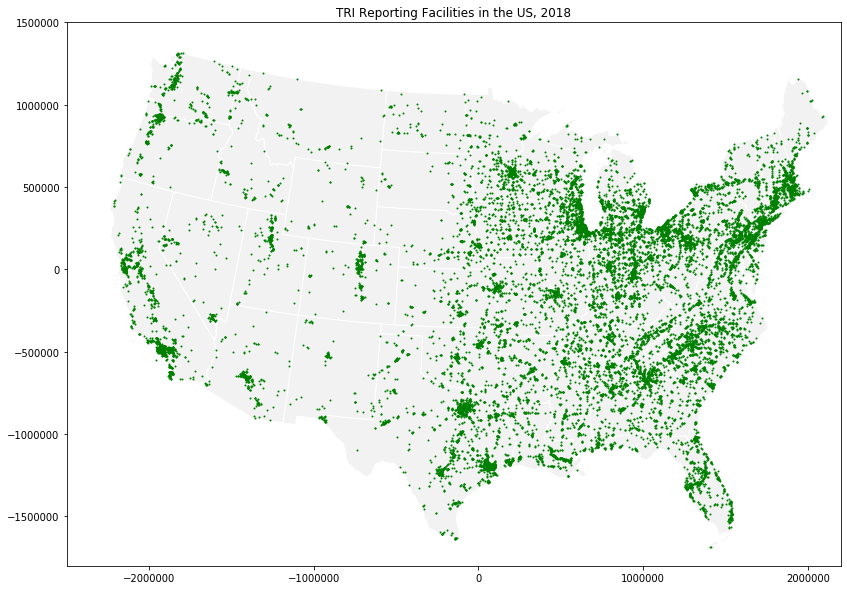

In [26]:
#plot TRI facilities over state basemap to check and visualize distribution
states = gpd.read_file('http://www2.census.gov/geo/tiger/GENZ2017/shp/cb_2017_us_state_20m.zip')

#project each layer to Albers Equal Conic for visualization
states_equal = states.to_crs('+proj=aea +lat_1=20 +lat_2=60 +lat_0=40 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs')
gdf_equal = gdf.to_crs('+proj=aea +lat_1=20 +lat_2=60 +lat_0=40 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs')

#plot projected data
fig, ax = plt.subplots(figsize=(20,10))

states_equal.plot(ax=ax, edgecolor='white', color='#f2f2f2', zorder=0)
gdf_equal.plot(ax=ax, color='green', zorder=1, markersize=1);


ax.set(xlim=(-2500000,2200000), ylim=(-1800000,1500000), title='TRI Reporting Facilities in the US, 2018');

print;

In [22]:
# export geodataframe to geojson for further exploration
gdf.to_file("../data/tri-2018.geojson", driver='GeoJSON', encoding='utf-8')